<a href="https://colab.research.google.com/github/aiswaryakr07-png/PythonProject/blob/main/vgg19_tfipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
import os
from keras.layers import Dense,Flatten
from keras.models import Model   #model name seq
from keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt


In [4]:
Image_size=[224,224]

In [5]:
train_path='/content/drive/MyDrive/dataset1/train'
test_path='/content/drive/MyDrive/dataset1/test'

In [6]:
vgg=VGG19(input_shape=Image_size+[3],weights='imagenet',include_top=False)

In [7]:
for layer in vgg.layers:
  layer.trainable=False

In [8]:
x=Flatten() (vgg.output)
prediction=Dense(8,activation='softmax')(x)

In [9]:
model=Model(inputs=vgg.input,outputs=prediction)

In [10]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
train_datagen=ImageDataGenerator(rescale=1/255,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1/255)

In [12]:
training_set=train_datagen.flow_from_directory(train_path,target_size=(224,224),batch_size=32,class_mode='categorical')
testing_set=test_datagen.flow_from_directory(test_path,target_size=(224,224),batch_size=32,class_mode='categorical')

Found 7999 images belonging to 8 classes.
Found 4001 images belonging to 8 classes.


In [15]:
r=model.fit(training_set,validation_data=testing_set,epochs=1)

250/250 ━━━━━━━━━━━━━━━━━━━━ 304s 1s/step - accuracy: 1.0000 - loss: 0.0031 - val_accuracy: 0.9958 - val_loss: 0.0170


In [16]:
r.history


{'accuracy': [1.0],
 'loss': [0.0028193420730531216],
 'val_accuracy': [0.9957510828971863],
 'val_loss': [0.017010385170578957]}

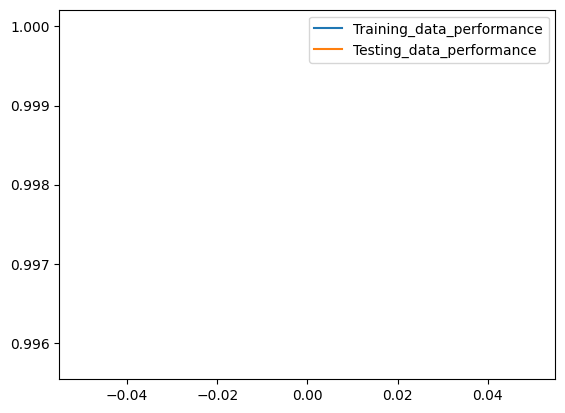

In [17]:
plt.plot(r.history['accuracy'],label='Training_data_performance')
plt.plot(r.history['val_accuracy'],label='Testing_data_performance')
plt.legend()
plt.show()

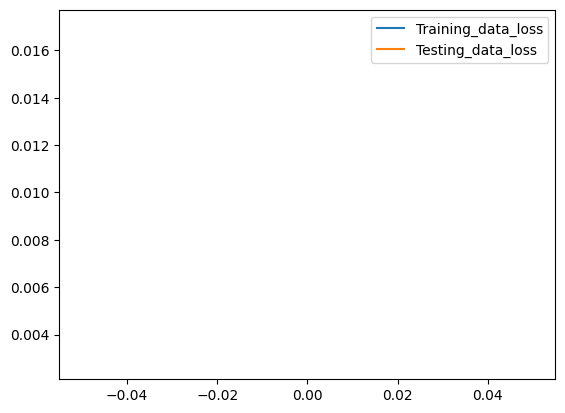

In [18]:
plt.plot(r.history['loss'],label='Training_data_loss')
plt.plot(r.history['val_loss'],label='Testing_data_loss')
plt.legend()
plt.show()

In [19]:
model.save('vgg19.h5')

In [20]:
from skimage.io import imread
from skimage.transform import resize

In [38]:
def predict(imgpath,model):
  img=imread(imgpath)
  img1=resize(img,(224,224))
  img1=img1.reshape(1,224,224,1)
  pred=model.predict(img1)
  ind=pred.argmax()
  datadir=['fist','five','none','okay','peace','rad','straight','thumbs']
  datadir.sort()
  print(datadir[ind])

In [57]:
imgpath='/content/drive/MyDrive/dataset1/test/thumbs/1.png'

In [58]:
def predict(imgpath, model):
  img = imread(imgpath)
  img1 = resize(img, (224, 224), anti_aliasing=True)

  # Ensure the image has 3 channels for VGG19
  if img1.ndim == 2:  # Grayscale image
    img1 = np.stack([img1, img1, img1], axis=-1) # Convert to 3 channels by stacking
  elif img1.ndim == 3 and img1.shape[-1] == 4: # RGBA image
    img1 = img1[..., :3] # Remove alpha channel if present

  # Add batch dimension
  img1 = np.expand_dims(img1, axis=0) # Shape will be (1, 224, 224, 3)

  pred = model.predict(img1)
  ind = pred.argmax()

  # Dynamically get class labels from the training_set used for model training
  # This ensures correct mapping even if class names change or number of classes is different
  class_labels = sorted(training_set.class_indices.keys(), key=training_set.class_indices.get)

  print(class_labels[ind])

# Call the corrected predict function
predict(imgpath, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
thumbs
